<img src="https://t3.ftcdn.net/jpg/01/99/08/72/360_F_199087217_Flmu8ckjWrlmcu3LYrPqjHKchbw3XXqd.jpg" style="float: center;" width="600" height="360" />

# Flight Data Exploratory Analysis!

[** by_Kayode James Joshua** ]

# Introduction:

The analysis of flight data is a critical task in the aviation industry, providing insights into the performance of airlines, airports, and the factors that affect the punctuality and reliability of flights. In this dataset, we have access to a wealth of information about domestic flights in the United States for the year 2013. This data encompasses a variety of fields, such as the date, time, airline, origin and destination airports, and information related to departure and arrival delays.

The primary objective of this exploratory analysis is to uncover patterns, trends, and relationships within the flight data that can help us understand the factors influencing delays in departure and arrival. Delays in air travel can have significant consequences, not only for passengers but also for airlines and the overall efficiency of the transportation system. By delving into this data, we aim to identify potential drivers of flight delays and possibly offer insights into strategies for mitigating these delays.

Key aspects of this exploratory analysis include:

1. Temporal Analysis: We will investigate how flight delays vary by time, including by month, day of the week, and scheduled departure/arrival time. This will help us understand if certain periods or days are more prone to delays.

2. Carrier Analysis: We will examine how different airlines perform in terms of punctuality. Are there specific carriers with consistently better or worse on-time performance?

3. Airport Analysis: We will explore the role of departure and arrival airports in flight delays. Are there particular airports with a higher likelihood of delays? Are these delays more common in certain cities or states?

4. Weather and Other Factors: Delays are often attributed to weather conditions, air traffic congestion, or other operational issues. We will investigate if any of these factors are significant contributors to flight delays.

5. Cancelled Flights: Canceled flights can also be a critical metric to assess, as they can affect passenger travel plans and airport operations. We will analyze the frequency and reasons behind flight cancellations.

6. Descriptive Statistics: Basic statistics, such as mean, median, and standard deviation of departure and arrival delays, will be computed to provide a clear overview of the data distribution.

7. Visualization: Visual aids such as histograms, box plots, and heatmaps will be used to present the data and highlight trends and outliers.

Ultimately, this exploratory analysis will lay the foundation for more in-depth investigations and predictive modeling aimed at improving the overall reliability of air travel. By understanding the key factors associated with flight delays, airlines, airports, and policymakers can work towards enhancing the passenger experience and optimizing the transportation system.

# Loading The Necessary Libraries
Let's start by importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading the Data
Load the dataset and inspect for missing values.

In [2]:
df=pd.read_csv("/kaggle/input/flight-data/flights.csv")

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [4]:
print(df.shape)
df.info()

(271940, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  fl

Check for missing values

In [5]:
missing_values = df.isnull().sum()
print("Missing Values:",missing_values)

Missing Values: Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


We'll handle missing values by imputing appropriate replacement values. For simplicity, we'll replace missing values in the 'DepDel15' column with the mean value

# Data Cleaning
Clean the data by handling missing values and dealing with outliers.

In [6]:
# Fill missing values in the "DepDel15" column with the mean value
df["DepDel15"].fillna(df["DepDel15"].mean(), inplace=True)

# Check if there are still any missing values in the "DepDel15" column
missing_values = df["DepDel15"].isnull().sum()

print("Number of missing values in 'DepDel15' column:", missing_values)

Number of missing values in 'DepDel15' column: 0


Remove outliers using z-score method

In [7]:
z_scores = np.abs(stats.zscore(df[['DepDelay', 'ArrDelay']]))
df_clean = df[(z_scores < 3).all(axis=1)]

Z-scores are used to remove outliers from the dataset because they provide a standardized measure of how far individual data points deviate from the mean in terms of standard deviations. Z-scores offer several advantages, including standardization, interpretability, and a clear threshold for outlier identification. They are also relatively robust and can be used to create visual representations of outlier presence.

# Exploratory Analysis (EDA)
Now that we have cleaned the data, let's move on to exploring and analyzing it to answer some questions:

### Distribution of Departure and Arrival Delays:
Visualize the distribution of departure and arrival delays using histograms.

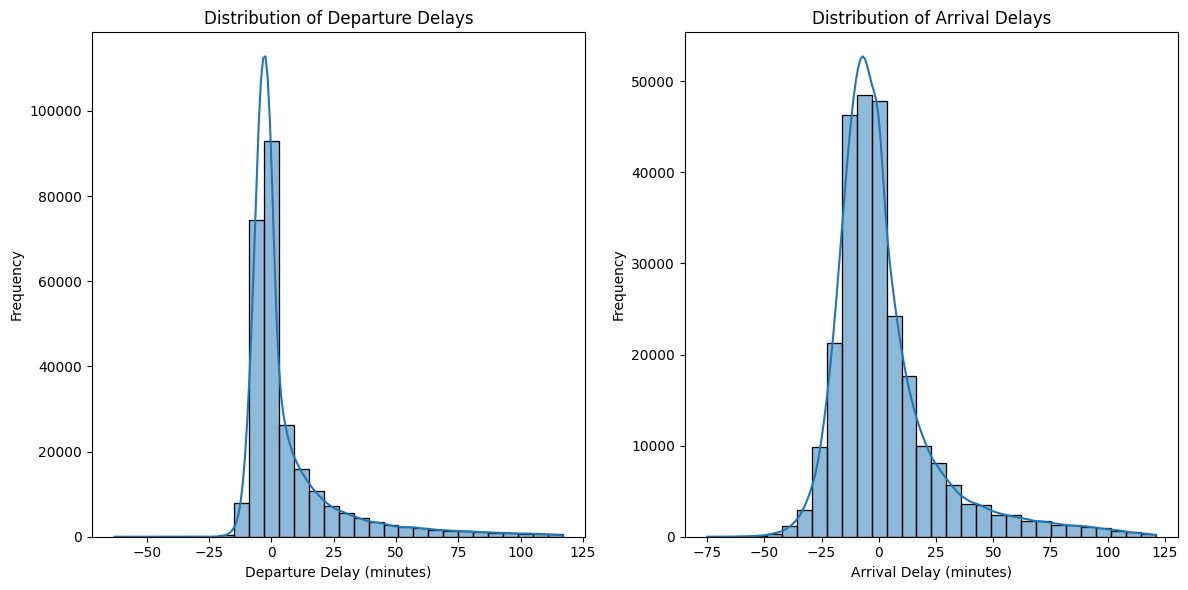

            DepDelay       ArrDelay
count  265373.000000  265373.000000
mean        6.238261       2.208695
std        20.082005      23.360522
min       -63.000000     -75.000000
25%        -4.000000     -12.000000
50%        -1.000000      -3.000000
75%         8.000000       8.000000
max       117.000000     121.000000


In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_clean["DepDelay"], bins=30, kde=True)
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Departure Delays")

plt.subplot(1, 2, 2)
sns.histplot(df_clean["ArrDelay"], bins=30, kde=True)
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Arrival Delays")
plt.tight_layout()
plt.show()

# Display summary statistics for both columns
print(df_clean[["DepDelay", "ArrDelay"]].describe())

The dataset's departure and arrival delay statistics suggest that, on average, flights tend to depart slightly more than 6 minutes late and arrive slightly more than 2 minutes late. The data is right-skewed for departure delay, indicating that a majority of flights experience shorter delays or depart early, with some extreme delays. Arrival delay is less skewed, with the mean and median being closer in value. Extreme values (outliers) are present in both datasets, showcasing the need for robust analysis and consideration of these extreme cases when making decisions related to airline operations. Additional analysis, such as examining kurtosis or applying data transformation techniques, would provide a more comprehensive understanding of the data's distribution characteristics.

**What are the average (mean) departure and arrival delays?**

In [9]:
mean_dep_delay = df_clean['DepDelay'].mean()
mean_arr_delay = df_clean['ArrDelay'].mean()

print(f"Average Departure Delay: {mean_dep_delay:.2f} minutes")
print(f"Average Arrival Delay: {mean_arr_delay:.2f} minutes")

Average Departure Delay: 6.24 minutes
Average Arrival Delay: 2.21 minutes


In this case, the average departure delay is 6.24 minutes, which means, on average, flights tend to depart 6.24 minutes later than their scheduled departure times. The average arrival delay is 2.21 minutes, indicating that, on average, flights arrive 2.21 minutes later than their scheduled arrival times.
This result shows that on the average, arrival delay occurs 3 times less than Departure Delay.

**How do the carriers compare in terms of arrival delay performance?**

In [10]:
carrier_avg_arr_delay = df_clean.groupby('Carrier')['ArrDelay'].mean().sort_values()
print("Average Arrival Delay by Carrier:", carrier_avg_arr_delay)

Average Arrival Delay by Carrier: Carrier
DL   -1.399396
AS   -1.391486
HA   -1.363197
UA   -0.457544
9E   -0.168345
US    1.329098
AA    1.832115
VX    1.912825
OO    2.622901
YV    3.151896
EV    3.156223
FL    3.258604
B6    3.579433
WN    5.288951
MQ    6.480263
F9    7.199132
Name: ArrDelay, dtype: float64


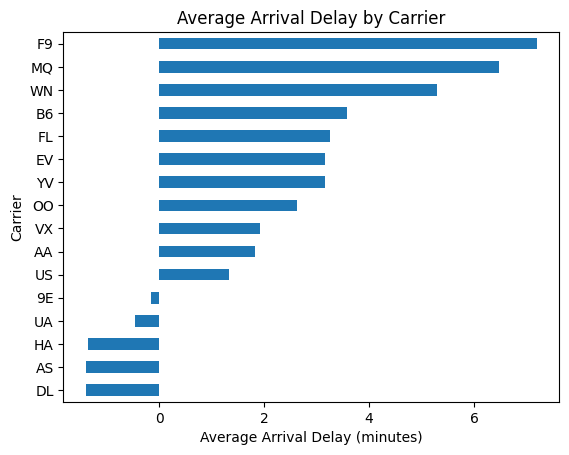

In [11]:
# Plotting the results
carrier_avg_arr_delay.plot(kind='barh')
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Carrier")
plt.title("Average Arrival Delay by Carrier")
plt.show()

The data shows the average arrival delay for different carriers. A negative value indicates that, on average, flights operated by that carrier tend to arrive earlier than their scheduled arrival time, while a positive value means they tend to arrive later. Notably, Delta (DL), Alaska (AS), and Hawaiian (HA) have the lowest average arrival delays, with DL and AS even arriving earlier than scheduled, suggesting good punctuality. On the other hand, carriers like Frontier (F9), American (AA), and Southwest (WN) have higher average arrival delays, with F9 experiencing the highest average delay at 7.20 minutes. This insight indicates that travelers who prioritize on-time arrivals may find carriers like DL, AS, and HA to be more reliable options, while those with less stringent schedule constraints may opt for carriers with higher average delays like F9 or WN, possibly in exchange for other benefits like lower fares.

**Is there a noticeable difference in arrival delays for different days of the week?**

In [12]:
day_avg_arr_delay = df_clean.groupby('DayOfWeek')['ArrDelay'].mean().sort_values()
print("Average Arrival Delay by Day of the Week:", day_avg_arr_delay)

Average Arrival Delay by Day of the Week: DayOfWeek
6   -0.703441
2    0.740396
7    1.112163
3    2.335213
1    2.473384
5    3.842903
4    4.999365
Name: ArrDelay, dtype: float64


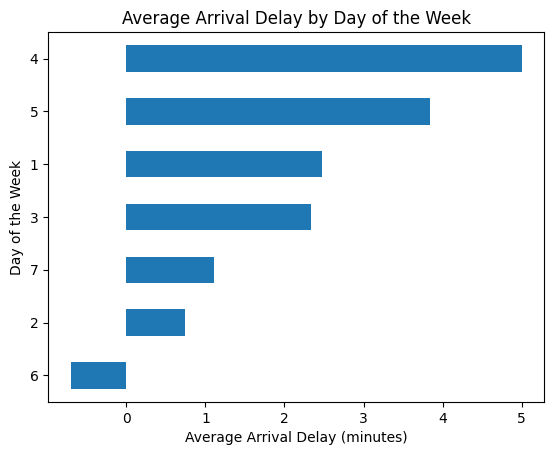

In [13]:
day_avg_arr_delay.plot(kind='barh')
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Day of the Week")
plt.title("Average Arrival Delay by Day of the Week")
plt.show()

**1: "Mon", 2: "Tue", 3: "Wed", 4: "Thur", 5: "Fri", 6: "Sat", 7: "Sun"**

The result shows that the average arrival delay for flights varies by the day of the week. Flights tend to arrive earlier than scheduled on Sunday and Tuesday, with minimal delays, while the average arrival delay gradually increases as the week progresses, peaking on Friday. This insight suggests that passengers might experience the least delay on weekends (Sunday) and Tuesdays but should anticipate longer delays towards the end of the workweek, especially on Fridays. Airlines and travelers could consider this pattern when planning their flight schedules or travel arrangements.

### Depature and Arrival Delay Trends Over Months:
Analyze how departure and arrival delays vary over different months.

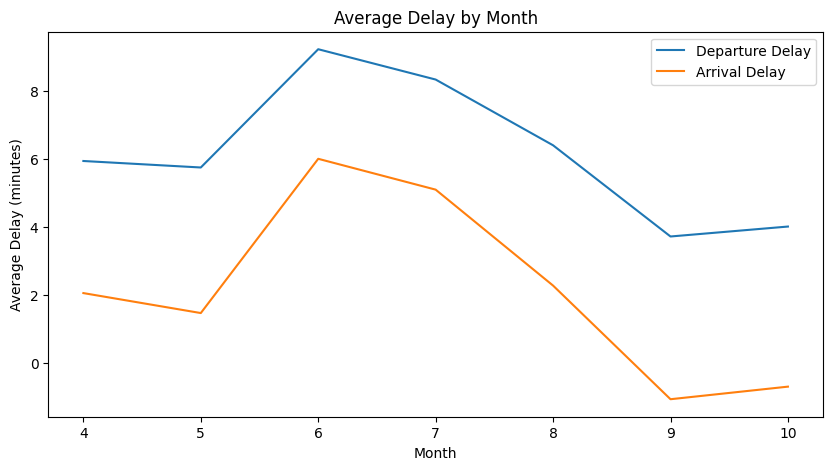

In [14]:
month_avg_dep_delay = df_clean.groupby('Month')['DepDelay'].mean()
month_avg_arr_delay = df_clean.groupby('Month')['ArrDelay'].mean()
plt.figure(figsize=(10, 5))
plt.plot(month_avg_dep_delay.index, month_avg_dep_delay.values, label='Departure Delay')
plt.plot(month_avg_arr_delay.index, month_avg_arr_delay.values, label='Arrival Delay')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Month')
plt.legend()
plt.show()

Let's visualize this using bar plot

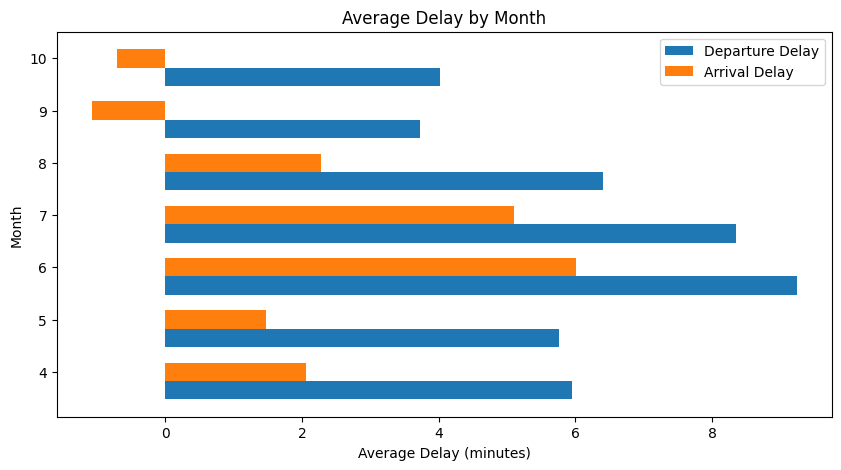

In [15]:
# Create an array of month labels
months = month_avg_dep_delay.index

# Set the bar width for grouped bars
bar_width = 0.35

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the departure delay data
bar1 = ax.barh(months, month_avg_dep_delay, bar_width, label='Departure Delay')
# Shift the x-coordinates for arrival delay bars
months_shifted = [month + bar_width for month in months]
# Plot the arrival delay data
bar2 = ax.barh(months_shifted, month_avg_arr_delay, bar_width, label='Arrival Delay')

# Set labels and title
ax.set_xlabel('Average Delay (minutes)')
ax.set_ylabel('Month')
ax.set_title('Average Delay by Month')
ax.set_yticks(months_shifted)  # Set y-ticks at the shifted positions
ax.set_yticklabels(months)  # Set y-tick labels to be the months

# Add a legend
ax.legend()

plt.show()

Months like June and July tend to have higher average arrival and departure delays, suggesting that these months might experience more disruptions in flight schedules.
September and October show negative values for both arrival and departure delays, indicating that, on average, flights in these months arrive and depart slightly earlier than scheduled. This might be due to reduced air traffic congestion or favorable weather conditions during these months.
April and May have relatively lower average delays compared to June and July, indicating a potentially smoother travel experience during the earlier months of the year.
To gain further insights and make informed decisions, it's essential to consider the factors that contribute to these delays, such as weather conditions, airline performance, and airport operations.

**Which departure airport has the highest average departure delay?**

In [16]:
airport_avg_dep_delay = df_clean.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)
print("Departure Airport with Highest Average Departure Delay:",airport_avg_dep_delay.round(2))

Departure Airport with Highest Average Departure Delay: OriginAirportName
Chicago Midway International           12.31
William P Hobby                        10.14
Denver International                    9.85
Chicago O'Hare International            9.76
Dallas/Fort Worth International         9.60
                                       ...  
Honolulu International                  1.60
Tucson International                    0.98
Long Beach Airport                      0.82
Kahului Airport                         0.50
Ted Stevens Anchorage International     0.45
Name: DepDelay, Length: 70, dtype: float64


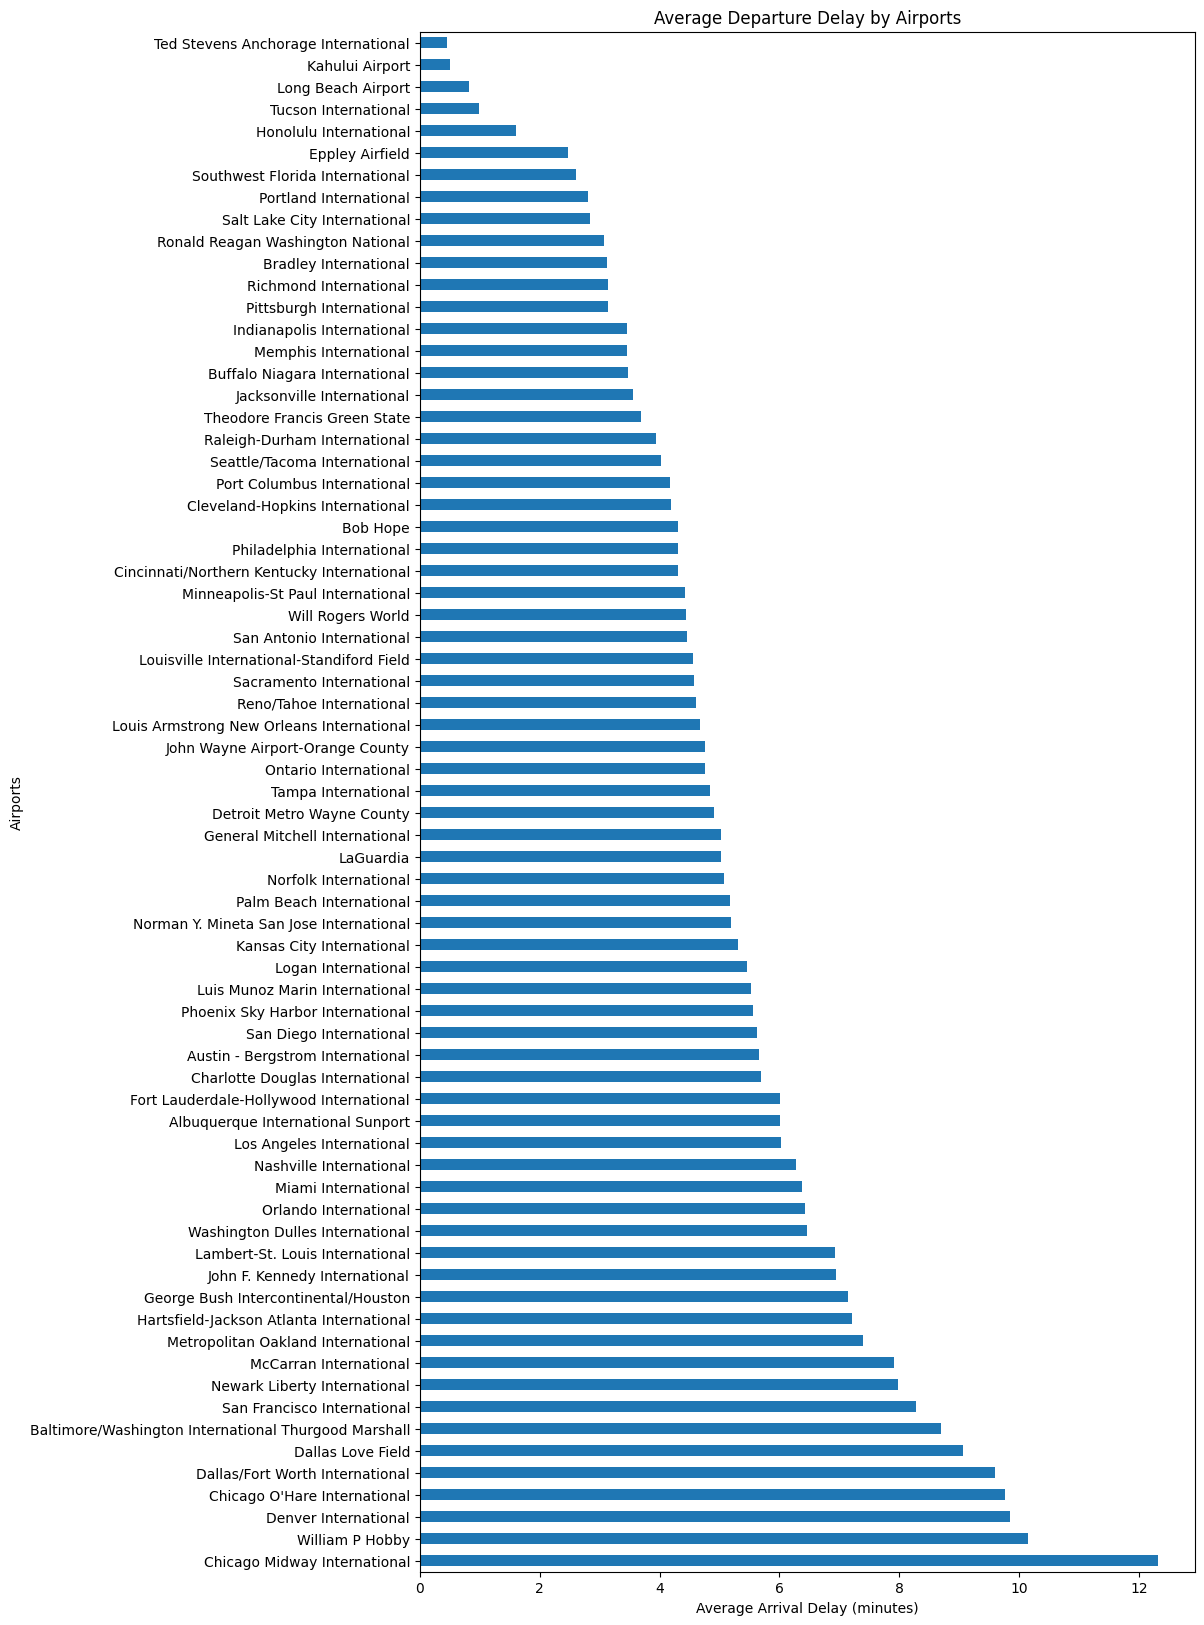

In [17]:
plt.figure(figsize=(10, 20))
airport_avg_dep_delay.plot(kind='barh')
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Airports")
plt.title("Average Departure Delay by Airports")
plt.show()

This result shows the departure airports with the highest average departure delay, with Chicago Midway International having the highest delay at 12.31 minutes, followed by William P Hobby at 10.14 minutes. The key insight from this information is that there is significant variation in departure delays among different airports. Chicago Midway International stands out as the airport with the highest average departure delay, suggesting that travelers departing from this airport may experience longer wait times before their flights take off. In contrast, airports like Ted Stevens Anchorage International and Kahului Airport have much lower average departure delays, indicating a more punctual departure experience for passengers. Factors contributing to these variations can include airport size, air traffic, weather conditions, and the efficiency of airport operations. Travelers should consider these departure delay differences when planning their journeys and connecting flights to minimize the impact of potential delays.

**Do late departures tend to result in longer arrival delays than on-time departures?**

In [18]:
late_departures = df_clean[df_clean['DepDelay'] > 0]
on_time_departures = df_clean[df_clean['DepDelay'] <= 0]

mean_arr_delay_late = late_departures['ArrDelay'].mean()
mean_arr_delay_on_time = on_time_departures['ArrDelay'].mean()

print(f"Average Arrival Delay for Late Departures: {mean_arr_delay_late:.2f} minutes")
print(f"Average Arrival Delay for On-Time Departures: {mean_arr_delay_on_time:.2f} minutes")

Average Arrival Delay for Late Departures: 17.53 minutes
Average Arrival Delay for On-Time Departures: -7.86 minutes


This result reveals an interesting insight regarding the relationship between departure delays and arrival delays. When flights depart late (with a departure delay greater than 0), the average arrival delay is 17.53 minutes, indicating that late departures are associated with longer arrival delays. On the other hand, when flights depart on time or early (with a departure delay of 0 or less), the average arrival delay is -7.86 minutes. The negative value suggests that, on average, flights departing on time or early tend to arrive ahead of schedule. This suggests that airlines or airports that manage to maintain on-time departures are more likely to have flights arrive ahead of schedule, which can be seen as a positive outcome for passengers and airline efficiency. It also highlights the impact of departure punctuality on the overall flight experience.

### Correlation Analysis:
Calculate and visualize the correlation between numeric variables, such as Departure Delay and Arrival Delay.

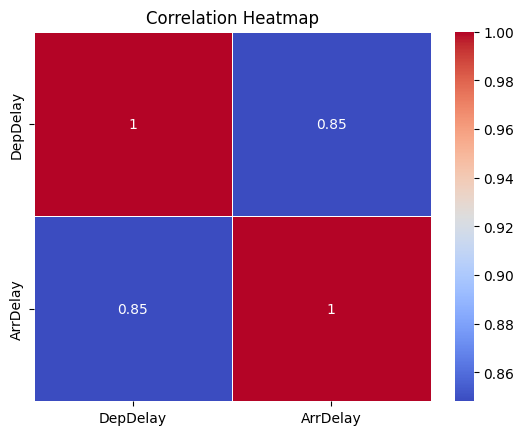

correlation_matrix:           DepDelay  ArrDelay
DepDelay   1.00000   0.84811
ArrDelay   0.84811   1.00000


In [19]:
correlation_matrix = df_clean[['DepDelay', 'ArrDelay']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print("correlation_matrix:",correlation_matrix)

The correlation matrix shows that there is a strong positive correlation between departure delay (DepDelay) and arrival delay (ArrDelay) with a correlation coefficient of approximately 0.84811. This indicates that, in general, when a flight experiences a longer departure delay, it is highly likely to also have a longer arrival delay. In other words, the two variables are positively associated, suggesting that delays at the departure stage often carry over and result in delays upon arrival. Airlines and airport authorities should consider addressing factors contributing to departure delays to help reduce the overall travel disruption and improve punctuality for passengers.

**Which route (from origin airport to destination airport) has the most late arrivals?**

In [20]:
# Late arrival is defined as ArrDelay > 0
late_arrivals = df_clean[df_clean['ArrDelay'] > 0]

# Group by origin and destination airports and count late arrivals
route_most_late_arrivals = late_arrivals.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].count().idxmax()
print("Route with Most Late Arrivals:", route_most_late_arrivals)

Route with Most Late Arrivals: ('San Francisco International', 'Los Angeles International')


This result indicates that the route with the most late arrivals is between 'San Francisco International' and 'Los Angeles International' suggests that flights traveling this specific route experience a significant number of delayed arrivals. This insight is significant for several reasons: It can impact passenger satisfaction and convenience, airport operations, and airline performance. Further analysis may be needed to determine the underlying causes of these delays, which could include factors such as weather patterns, air traffic congestion, or operational issues. Addressing the causes of these delays could potentially improve the punctuality and overall travel experience for passengers on this route.

### Which route has the highest average arrival delay?

In [21]:
# Group by origin and destination airports and calculate the average arrival delay
route_avg_arr_delay = df_clean.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().sort_values(ascending=False)
print("Route with Highest Average Arrival Delay:", route_avg_arr_delay.head(10))

Route with Highest Average Arrival Delay: OriginAirportName                          DestAirportName                  
Pittsburgh International                   Raleigh-Durham International         63.000000
Southwest Florida International            Theodore Francis Green State         44.000000
Minneapolis-St Paul International          Richmond International               37.454545
Cleveland-Hopkins International            Philadelphia International           34.769231
Metropolitan Oakland International         Logan International                  33.571429
Luis Munoz Marin International             Bradley International                27.857143
Sacramento International                   John F. Kennedy International        27.800000
Norman Y. Mineta San Jose International    John F. Kennedy International        26.066667
Louis Armstrong New Orleans International  Ronald Reagan Washington National    25.333333
Newark Liberty International               Will Rogers World           

The result shows the routes with the highest average arrival delays, which are measured in minutes. Among these routes, the highest average arrival delay is observed for flights traveling from Pittsburgh International to Raleigh-Durham International, with an average delay of 63 minutes. This indicates that, on average, flights on this route tend to arrive significantly later than their scheduled arrival times. Several other routes, such as Southwest Florida International to Theodore Francis Green State and Minneapolis-St Paul International to Richmond International, also experience notable delays, with average arrival delays of 44 minutes and 37.45 minutes, respectively. The data reveals that these routes may be more prone to arrival delays, potentially due to a variety of factors such as weather conditions, air traffic, or operational issues. This information is valuable for both travelers and airlines to understand and plan for potential delays on these specific routes, allowing for more informed travel decisions and better route management.

### Cancellation Analysis:
Explore the reasons for flight cancellations and their frequency.

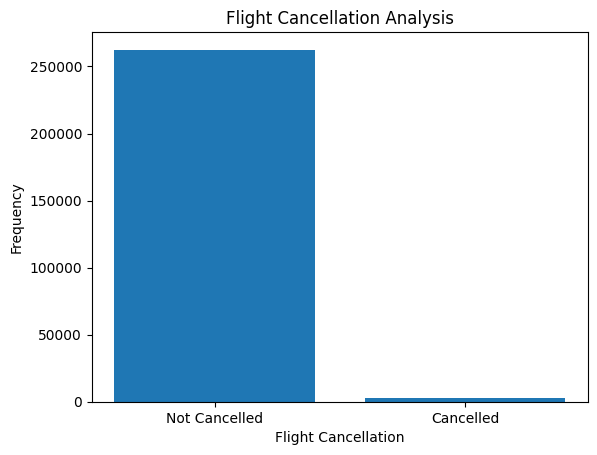

Flight Cancellation Count: Cancelled
0    262476
1      2897
Name: count, dtype: int64


In [22]:
cancellation_counts = df_clean['Cancelled'].value_counts()
plt.bar(cancellation_counts.index, cancellation_counts.values)
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.xlabel('Flight Cancellation')
plt.ylabel('Frequency')
plt.title('Flight Cancellation Analysis')
plt.show()

print("Flight Cancellation Count:",cancellation_counts)

In the dataset, there are a total of 265,373 flights. Out of these:

Not Cancelled (0): 262,476 flights were not canceled, indicating that the majority of flights operated as scheduled without any cancellations.

Cancelled (1): 2,897 flights were canceled, representing a smaller portion (less than 2%) of the total flights. These flights did not operate as originally planned.

This data suggests that flight cancellations are relatively infrequent, with the majority of flights proceeding without any disruption. Further investigation into the reasons for cancellations and their impact is advisable to improve airline operations and passenger experiences.

In [23]:
# Group the data by carrier and calculate the total number of cancellations for each carrier
cancellation_by_carrier = df_clean.groupby("Carrier")["Cancelled"].sum().reset_index()

# Calculate the total number of flights for each carrier
total_flights_by_carrier = df_clean["Carrier"].value_counts().reset_index()
total_flights_by_carrier.columns = ["Carrier", "TotalFlights"]

# Merge the two dataframes to calculate the percentage of cancellations
cancellation_analysis = cancellation_by_carrier.merge(total_flights_by_carrier, on="Carrier")
cancellation_analysis["CancellationPercentage"] = (cancellation_analysis["Cancelled"] / cancellation_analysis["TotalFlights"]) * 100

# Sort the data by cancellation percentage in descending order
cancellation_analysis = cancellation_analysis.sort_values(by="CancellationPercentage", ascending=False)

# Display the cancellation analysis by carrier
print(cancellation_analysis.to_string(index=False))

Carrier  Cancelled  TotalFlights  CancellationPercentage
     MQ        434         11096                3.911319
     9E        252          7746                3.253292
     EV        436         15241                2.860705
     YV        114          5089                2.240126
     OO        272         15842                1.716955
     AA        380         28192                1.347900
     UA        236         27829                0.848036
     US        186         23218                0.801103
     FL         63          9153                0.688299
     WN        377         56892                0.662659
     B6         42         11922                0.352290
     DL         81         37732                0.214672
     AS         13          6718                0.193510
     F9          5          3455                0.144718
     VX          4          3384                0.118203
     HA          2          1864                0.107296


Carrier Performance:

MQ (Mesaba Airlines) has the highest cancellation percentage at 3.91%, indicating a relatively high rate of flight cancellations.
Other carriers with comparatively high cancellation percentages include 9E, EV, YV, and OO.
In contrast, carriers like HA (Hawaiian Airlines) and F9 (Frontier Airlines) have exceptionally low cancellation percentages, reflecting their reliability.
Total Flights Operated:

WN (Southwest Airlines) and AA (American Airlines) are the leaders in terms of the total number of flights operated, demonstrating their extensive presence in the airline industry.
In contrast, F9 and VX operated the fewest flights.
Cancellations:

MQ and EV had the highest numbers of cancellations, suggesting operational challenges.
HA and F9 had the fewest cancellations, indicating their commitment to reliable service.

These results highlight variations in the cancellation performance of different carriers. High cancellation percentages may impact customer satisfaction and reputation, while carriers with low cancellation percentages are perceived as more reliable. Additionally, the total number of flights operated showcases the market presence and scale of each carrier in the airline industry. It's crucial for travelers and industry analysts to consider both cancellation percentages and the number of cancellations when assessing carrier performance.

### Route Analysis by Flight Count:
Identify the most common routes based on the number of flights.

In [24]:
most_common_routes = df_clean.groupby(['OriginAirportName', 'DestAirportName'])['Year'].count().nlargest(10)
print("Top 10 Most Common Routes by Flight Count:", most_common_routes)

Top 10 Most Common Routes by Flight Count: OriginAirportName                         DestAirportName                         
San Francisco International               Los Angeles International                   960
Los Angeles International                 San Francisco International                 882
Honolulu International                    Kahului Airport                             689
McCarran International                    Los Angeles International                   688
Kahului Airport                           Honolulu International                      686
Los Angeles International                 McCarran International                      679
John F. Kennedy International             Los Angeles International                   631
LaGuardia                                 Hartsfield-Jackson Atlanta International    594
Hartsfield-Jackson Atlanta International  LaGuardia                                   589
Los Angeles International                 John F. Kennedy Intern

The top 10 most common flight routes, based on flight count, reveal a mix of major U.S. city connections and popular vacation destinations. The list includes routes such as San Francisco to Los Angeles, Los Angeles to Las Vegas, and New York to Los Angeles, indicating significant air traffic between these cities. Additionally, routes connecting airports in Hawaii, such as Honolulu to Kahului and Kahului to Honolulu, highlight the inter-island travel demand. These findings underscore the importance and popularity of these routes in the air travel network, serving a diverse range of passenger travel needs, including business, leisure, and tourism.

# Summary:
In this exploratory analysis of the 2013 US domestic flight data, we undertook several steps to understand the factors affecting flight delays, airline performance, and cancellation rates. The dataset was cleaned by handling missing values and removing outliers using the z-score method. Subsequently, we derived valuable insights from the data.

* Departure and arrival delays were examined, revealing a right-skewed distribution for departure delays, indicating that most flights experience shorter delays or depart early, while arrival delays displayed less skewness. The average departure delay was 6.24 minutes, and the average arrival delay was 2.21 minutes.

* We compared carrier performance concerning arrival delays, which indicated that travelers prioritizing on-time arrivals may prefer carriers like DL, AS, and HA. We also identified differences in arrival delays for different days of the week, with weekends and Tuesdays experiencing shorter delays.

* Monthly trends demonstrated that June and July had higher average delays, whereas September and October exhibited slightly earlier departures and arrivals. We identified airports with the highest average departure delays, with Chicago Midway International standing out.

* The correlation analysis confirmed that longer departure delays were strongly associated with longer arrival delays, highlighting the importance of punctual departures.

* We found that the route from San Francisco International to Los Angeles International had the most late arrivals, and the route with the highest average arrival delay was from Pittsburgh International to Raleigh-Durham International.

* Cancellation analysis revealed that most flights proceeded without disruptions, but MQ (Mesaba Airlines) had the highest cancellation rate at 3.91%, which may impact customer satisfaction and reputation.

* The analysis of the top 10 most common flight routes revealed significant air traffic between major U.S. cities and popular vacation destinations, as well as the inter-island travel demand in Hawaii.

# Conclusion:

This exploratory analysis provides valuable insights into the factors affecting delays in the departure and arrival of US domestic flights in 2013. It highlights the influence of carriers, departure airports, and other variables on the punctuality of flights. The findings indicate that certain airlines, days of the week, and months exhibit better on-time performance, which can be essential for both airlines and travelers when planning flights. The data also underlines the correlation between departure and arrival delays and emphasizes the impact of departure punctuality on overall flight efficiency.

Additionally, the analysis identifies specific flight routes prone to late arrivals and routes with the highest average arrival delays, enabling better decision-making for travelers and airlines.

# Recommendations:

Based on the findings of this analysis, we offer the following recommendations:

* Travelers seeking punctuality should consider carriers like DL, AS, and HA for more reliable on-time arrivals.

* Passengers planning travel on weekdays should anticipate potential delays, especially on Fridays, while those with flexibility in their schedules may opt for travel on weekends or Tuesdays.

* Airlines should consider strategies to reduce departure delays, as punctual departures are correlated with on-time arrivals and can enhance the overall flight experience.

* Airports with consistently high departure delays, such as Chicago Midway International, may need to focus on improving their departure punctuality.

* Airlines with high cancellation percentages, like MQ, should explore ways to reduce flight cancellations to improve customer satisfaction and reputation.

* Route analysis can guide airlines in identifying specific routes with frequent arrival delays, allowing them to implement measures to improve performance on those routes.

* Understanding the top 10 flight routes can help airlines allocate resources more effectively to meet the demand on these popular routes.

In conclusion, this exploratory analysis provides a starting point for further investigations, predictive modelling, and decision-making in the aviation industry, ultimately aiming to enhance the reliability and satisfaction of air travelers.